This examples show the features of the class LayeredFeatureMap that can be used for a simple
custom creation of new feature maps.

In [1]:
import numpy as np
from squlearn.feature_map.layered_feature_map import LayeredFeatureMap, Layer

In [4]:
# Build a layered feature map from a string;
# default strings are "x" for input data and "p" for parameters.
# Sequences of gates can be repeated using the notation N[...] where N is the number of repetitions.
# Custom encodings can be implemented by for example Rx(p,x;=p*np.arccos(x),{p,x}),
# in which the function following "=" is the encoding function based on the variables in the curly brackets.
# The resulting feature map can be used as a repeateable layer where num_layers specifies the number of repetitions.

lfm = LayeredFeatureMap.from_string(
    "Ry(p)-2[Rx(p,x;=p*np.arccos(x),{p,x})-crz(p)]-Ry(p)", num_qubits=5, num_features=1, num_layers=2
)
lfm.draw()

┌──────────┐┌─────────────────────┐             ┌──────────────────────┐»
q_0: ┤ Ry(p[0]) ├┤ Rx(p[5]*acos(x[0])) ├──────■──────┤ Rx(p[14]*acos(x[0])) ├»
     ├──────────┤├─────────────────────┤┌─────┴─────┐└──────────────────────┘»
q_1: ┤ Ry(p[1]) ├┤ Rx(p[6]*acos(x[0])) ├┤ Rz(p[10]) ├───────────■────────────»
     ├──────────┤├─────────────────────┤└───────────┘     ┌─────┴─────┐      »
q_2: ┤ Ry(p[2]) ├┤ Rx(p[7]*acos(x[0])) ├──────■───────────┤ Rz(p[12]) ├──────»
     ├──────────┤├─────────────────────┤┌─────┴─────┐     └───────────┘      »
q_3: ┤ Ry(p[3]) ├┤ Rx(p[8]*acos(x[0])) ├┤ Rz(p[11]) ├───────────■────────────»
     ├──────────┤├─────────────────────┤└───────────┘     ┌─────┴─────┐      »
q_4: ┤ Ry(p[4]) ├┤ Rx(p[9]*acos(x[0])) ├──────────────────┤ Rz(p[13]) ├──────»
     └──────────┘└─────────────────────┘                  └───────────┘      »
«                                          ┌───────────┐┌───────────┐»
«q_0: ──────────────────────────────■──────┤ Ry(p[23]) ├┤ Ry(p[28]) ├»
«     ┌──────────────────────┐┌─────┴─────┐└───────────┘├───────────┤»
«q_1: ┤ Rx(p[15]*acos(x[0])) ├┤ Rz(p[19]) ├──────■──────┤ Ry(p[24]) ├»
«     ├──────────────────────┤└───────────┘┌─────┴─────┐├───────────┤»
«q_2: ┤ Rx(p[16]*acos(x[0])) ├──────■──────┤ Rz(p[21]) ├┤ Ry(p[25]) ├»
«     ├──────────────────────┤┌─────┴─────┐└───────────┘├───────────┤»
«q_3: ┤ Rx(p[17]*acos(x[0])) ├┤ Rz(p[20]) ├──────■──────┤ Ry(p[26]) ├»
«     ├──────────────────────┤└───────────┘┌─────┴─────┐├───────────┤»
«q_4: ┤ Rx(p[18]*acos(x[0])) ├─────────────┤ Rz(p[22]) ├┤ Ry(p[27]) ├»
«     └──────────────────────┘             └───────────┘└───────────┘»
«     ┌──────────────────────┐                                     »
«q_0: ┤ Rx(p[33]*acos(x[0])) ├──────────────────────────────■──────»
«     └────┬───────────┬─────┘┌──────────────────────┐┌─────┴─────┐»
«q_1: ─────┤ Ry(p[29]) ├──────┤ Rx(p[34]*acos(x[0])) ├┤ Rz(p[38]) ├»
«          ├───────────┤      ├──────────────────────┤└───────────┘»
«q_2: ─────┤ Ry(p[30]) ├──────┤ Rx(p[35]*acos(x[0])) ├──────■──────»
«          ├───────────┤      ├──────────────────────┤┌─────┴─────┐»
«q_3: ─────┤ Ry(p[31]) ├──────┤ Rx(p[36]*acos(x[0])) ├┤ Rz(p[39]) ├»
«          ├───────────┤      ├──────────────────────┤└───────────┘»
«q_4: ─────┤ Ry(p[32]) ├──────┤ Rx(p[37]*acos(x[0])) ├─────────────»
«          └───────────┘      └──────────────────────┘             »
«     ┌──────────────────────┐                                     »
«q_0: ┤ Rx(p[42]*acos(x[0])) ├──────────────────────────────■──────»
«     └──────────────────────┘┌──────────────────────┐┌─────┴─────┐»
«q_1: ───────────■────────────┤ Rx(p[43]*acos(x[0])) ├┤ Rz(p[47]) ├»
«          ┌─────┴─────┐      ├──────────────────────┤└───────────┘»
«q_2: ─────┤ Rz(p[40]) ├──────┤ Rx(p[44]*acos(x[0])) ├──────■──────»
«          └───────────┘      ├──────────────────────┤┌─────┴─────┐»
«q_3: ───────────■────────────┤ Rx(p[45]*acos(x[0])) ├┤ Rz(p[48]) ├»
«          ┌─────┴─────┐      ├──────────────────────┤└───────────┘»
«q_4: ─────┤ Rz(p[41]) ├──────┤ Rx(p[46]*acos(x[0])) ├─────────────»
«          └───────────┘      └──────────────────────┘             »
«     ┌───────────┐             
«q_0: ┤ Ry(p[51]) ├─────────────
«     └───────────┘┌───────────┐
«q_1: ──────■──────┤ Ry(p[52]) ├
«     ┌─────┴─────┐├───────────┤
«q_2: ┤ Rz(p[49]) ├┤ Ry(p[53]) ├
«     └───────────┘├───────────┤
«q_3: ──────■──────┤ Ry(p[54]) ├
«     ┌─────┴─────┐├───────────┤
«q_4: ┤ Rz(p[50]) ├┤ Ry(p[55]) ├
«     └───────────┘└───────────┘

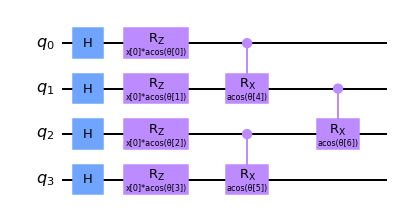

In [3]:
# Build a layered feature map from qiskit inspired commands
# Single qubit gates are applied to all qubits
# Two qubit gates are applied either in a all-to-all or a nearest neighbor arrangement
# Encoding maps can be specified by a custom python function

lfm2 = LayeredFeatureMap(4, 1)


def multiply_with_arccos(x, y):
    return x * np.arccos(y)


lfm2.H()
lfm2.Rz("x", "p", map=multiply_with_arccos)
lfm2.crx_entangling("p", map=np.arccos)
lfm2.draw()

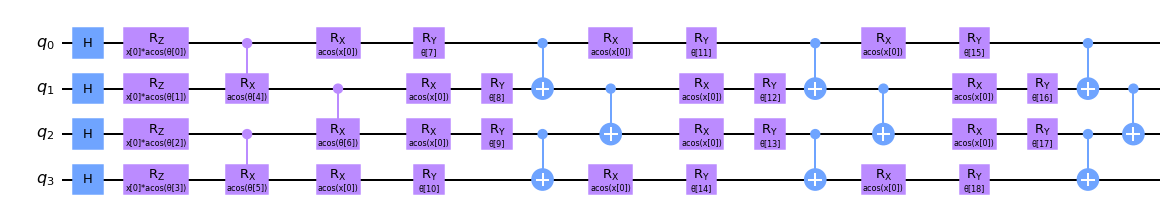

In [4]:
# Create a Layer that is repeated multiple times

# Creates the layer associated with feature map lfm2
layer = Layer(lfm2)
layer.Rx("x", map=np.arccos)
layer.Ry("p")
layer.cx_entangling()

# Add the layer to the feature map lfm2
lfm2.add_layer(layer, num_layers=3)
lfm2.draw()